# Getting Started: Load libraries and set options

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load the dataset

In [61]:
dataset = pd.read_excel(r"C:/Users/niraj/OneDrive/Desktop/dsp15.xlsx")

In [62]:
dataset.head()

,Employee No,Profit Center,Employee Position,Employee Location,People Group,Supervisor name,Current Status,Years Ex,Total Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
0,1,PC - 1,Level 2,Location 3,Client Service Staff,Idalina Lauraine,1,22.0,2088,216.0,70.0,1192.0,56.0,0.352941
1,2,PC - 2,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1,23.0,2088,156.0,50.0,694.0,734.0,0.295165
2,3,PC - 2,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1,21.0,2088,144.0,45.5,507.0,549.5,0.529102
3,4,PC - 3,Level 2,Location 1,Client Service Staff,Idalina Lauraine,1,22.0,2088,208.0,29.0,1382.0,255.0,0.147488
4,5,PC - 4,Level 1,Location 3,Client Service Staff,Abagail Druci,1,24.0,1312,104.0,3.0,1159.0,818.0,0.123651


In [63]:
df = dataset.set_index('Employee No')

In [119]:
df.head()

,Profit Center,Employee Position,Employee Location,People Group,Supervisor name,Current Status,Years Ex,Total Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
Employee No,,,,,,,,,,,,,
1,PC - 1,Level 2,Location 3,Client Service Staff,Idalina Lauraine,1,22.0,2088,216.0,70.0,1192.0,56.0,0.003529
2,PC - 2,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1,23.0,2088,156.0,50.0,694.0,734.0,0.002952
3,PC - 2,Level 2,Location 7,Client Service Staff,Idalina Lauraine,1,21.0,2088,144.0,45.5,507.0,549.5,0.005291
4,PC - 3,Level 2,Location 1,Client Service Staff,Idalina Lauraine,1,22.0,2088,208.0,29.0,1382.0,255.0,0.001475
5,PC - 4,Level 1,Location 3,Client Service Staff,Abagail Druci,1,24.0,1312,104.0,3.0,1159.0,818.0,0.001237


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 1 to 1762
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Profit Center      1096 non-null   object 
 1   Employee Position  1096 non-null   object 
 2   Employee Location  1096 non-null   object 
 3   People Group       1096 non-null   object 
 4   Supervisor name    1091 non-null   object 
 5   Current Status     1096 non-null   int64  
 6   Years Ex           1096 non-null   float64
 7   Total Hours        1096 non-null   int64  
 8   Leave Hours        1096 non-null   float64
 9   Training Hours     1096 non-null   float64
 10  BD Hours           1096 non-null   float64
 11  NC Hours           1096 non-null   float64
 12  Utilization%       1096 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 119.9+ KB


In [66]:
df['Utilization%']

Employee No
1       0.352941
2       0.295165
3       0.529102
4       0.147488
5       0.123651
          ...   
1757    0.000000
1758    0.000000
1760    0.000000
1761    0.000000
1762    0.000000
Name: Utilization%, Length: 1096, dtype: float64

In [67]:
df['Utilization%'] = df['Utilization%'].astype(float)/100
df['Utilization%']

Employee No
1       0.003529
2       0.002952
3       0.005291
4       0.001475
5       0.001237
          ...   
1757    0.000000
1758    0.000000
1760    0.000000
1761    0.000000
1762    0.000000
Name: Utilization%, Length: 1096, dtype: float64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 1 to 1762
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Profit Center      1096 non-null   object 
 1   Employee Position  1096 non-null   object 
 2   Employee Location  1096 non-null   object 
 3   People Group       1096 non-null   object 
 4   Supervisor name    1091 non-null   object 
 5   Current Status     1096 non-null   int64  
 6   Years Ex           1096 non-null   float64
 7   Total Hours        1096 non-null   int64  
 8   Leave Hours        1096 non-null   float64
 9   Training Hours     1096 non-null   float64
 10  BD Hours           1096 non-null   float64
 11  NC Hours           1096 non-null   float64
 12  Utilization%       1096 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 119.9+ KB


In [69]:
df.isnull().sum()

Profit Center        0
Employee Position    0
Employee Location    0
People Group         0
Supervisor name      5
Current Status       0
Years Ex             0
Total Hours          0
Leave Hours          0
Training Hours       0
BD Hours             0
NC Hours             0
Utilization%         0
dtype: int64

In [70]:
a = df.columns[df.isnull().any()].to_list()

In [71]:
for i in a:
    data_type = df[i].dtype
    if data_type == "int64":
        value = df[i].mean()
        df[i] = df[i].fillna(value)
    else:
        value = df[i].mode()[0]
        df[i] = df[i].fillna(value)
    print(value)

Tiena Hatti


In [72]:
df.isnull().sum()

Profit Center        0
Employee Position    0
Employee Location    0
People Group         0
Supervisor name      0
Current Status       0
Years Ex             0
Total Hours          0
Leave Hours          0
Training Hours       0
BD Hours             0
NC Hours             0
Utilization%         0
dtype: int64

In [73]:
df['Current Status'].unique()

array([1, 0], dtype=int64)

From the results above, Current status is a categorical variable, because it represents a fix number of possible values (i.e, 0 and 1. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.

# Part 2: Exploratory Data Analysis

#Part 2: Exploratory Data Analysis
Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.

2.1 Objectives of Data Exploration
Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

The purpose of EDA is:

to use summary statistics and visualizations to better understand data, *find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
For data preprocessing to be successful, it is essential to have an overall picture of your data Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.**
Next step is to explore the data. There are two approached used to examine the data using:

Descriptive statistics is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.

Visualization is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

# 2.2 Descriptive statistics
Summary statistics are measurements meant to describe data. In the field of descriptive statistics, there are many summary measurements.

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # data visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [75]:
df.describe()

,Current Status,Years Ex,Total Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.846715,6.177920,1514.058394,160.505018,37.180593,59.123175,352.547929,0.006994
std,0.360426,3.176938,687.340512,148.889701,34.235174,235.974323,353.737846,0.003562
min,0.000000,0.000000,0.000000,0.000000,0.000000,-24.000000,-28.500000,0.000000
25%,1.000000,5.000000,920.000000,80.000000,10.000000,0.000000,93.000000,0.005103
50%,1.000000,6.000000,1800.000000,154.000000,27.000000,0.000000,254.750000,0.008003
75%,1.000000,7.000000,2088.000000,208.000000,55.500000,0.000000,481.250000,0.009358
max,1.000000,24.000000,2088.000000,1576.000000,169.000000,1876.000000,2458.500000,0.060000


In [76]:
df.skew()

C:\Users\niraj\AppData\Local\Temp/ipykernel_14716/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Current Status   -1.927436
Years Ex          1.251034
Total Hours      -0.870730
Leave Hours       4.319342
Training Hours    1.105725
BD Hours          5.055400
NC Hours          1.761185
Utilization%      2.356764
dtype: float64

In [77]:
#The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

In [78]:
df['Current Status'].unique()

array([1, 0], dtype=int64)

In [79]:
# Group by diagnosis and review the output.
diag_gr = df.groupby('Current Status', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
Current Status,
0,168
1,928




Active = 1 (indicates prescence of Active Employees)
Resigned = 0 (indicates Resgined)

Observation
928 shows Active Employees and 168 show Resgined Employees

Lets confirm this, by ploting the histogram

# 2.3 Unimodal Data Visualizations

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting Active or Resigned employee status. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that you can use to understand each attribute of your dataset independently.

Histograms.
Density Plots.
Box and Whisker Plots.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Status', ylabel='count'>

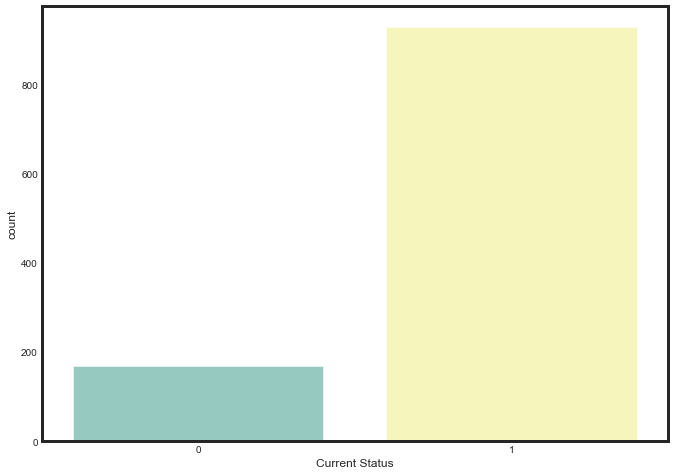

In [80]:

sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(df['Current Status'],label='Count',palette="Set3")

2.3.1 Visualise distribution of data via histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin.
From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

In [81]:
df.shape

(1096, 13)

# Separate columns into smaller dataframes to perform visualization

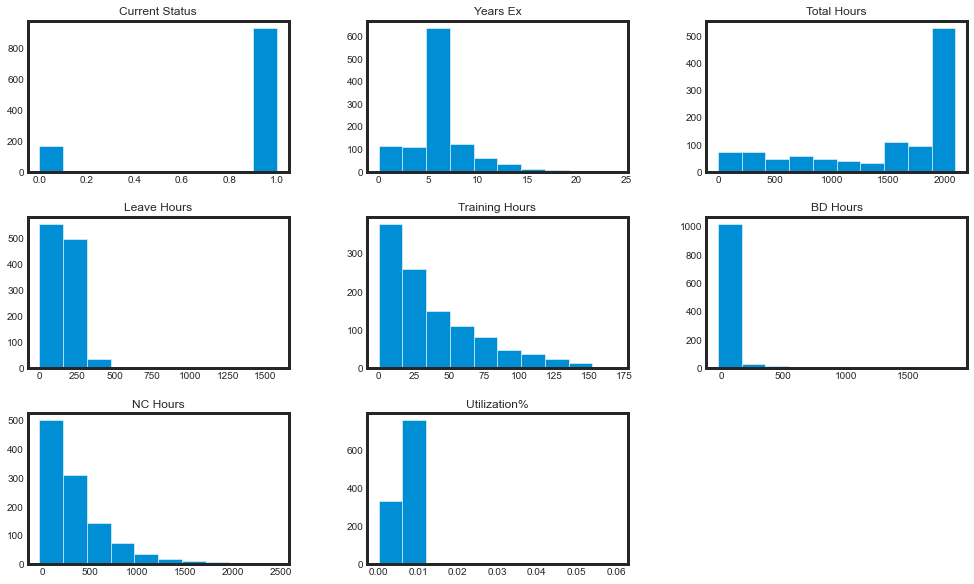

In [82]:
#Plot histograms of _se variables
hist_se=df.hist(bins=10, figsize=(15, 10),grid=False,)

# 2.3.2 Visualize distribution of data via density plots

Density plots _mean suffix designition

In [83]:
df_mean=df.iloc[:,1:13]

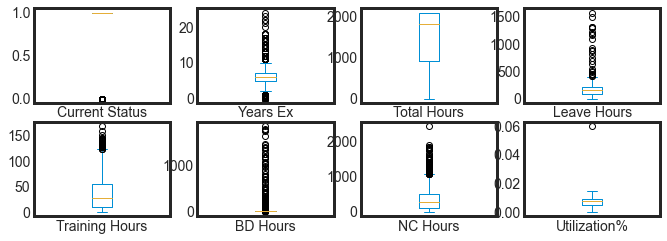

In [84]:
# box and whisker plots
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=14)


# 2.4 Multimodal Data Visualizations
Scatter plots
Correlation matrix

C:\Users\niraj\AppData\Local\Temp/ipykernel_14716/350357325.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:title={'center':'HR Feature Correlation'}>

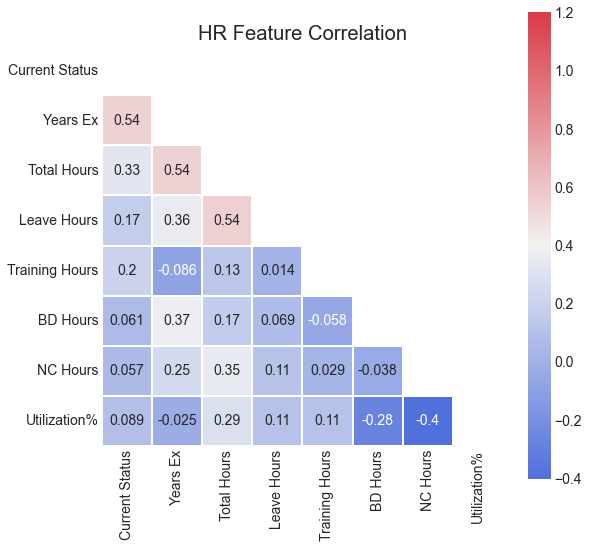

In [85]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = df_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
df_visulaise, ax = plt.subplots(figsize=(8, 8))
plt.title('HR Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

Observation:
We can see strong positive relationship exists with mean values paramaters between 1 to 0.75.

The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

# Part_3: Pre-Processing the data


Introduction:
Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:

Assigning numerical values to categorical data;
Handling missing values; 
and
Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

In Part_2, I explored the data, to help gain insight on the distribution of the data as well as how the attributes correlate to each other. I identified some features of interest. 
In this notebook I use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction.

Goal:
Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model.



# Label encoding
Here, I assign the 30 features to a NumPy array X, and transform the class labels from their original string  into integers

In [86]:
categorical_data = df[['Profit Center','Employee Position','Employee Location','People Group','Supervisor name']]

In [87]:
categorical_data

,Profit Center,Employee Position,Employee Location,People Group,Supervisor name
Employee No,,,,,
1,PC - 1,Level 2,Location 3,Client Service Staff,Idalina Lauraine
2,PC - 2,Level 2,Location 7,Client Service Staff,Idalina Lauraine
3,PC - 2,Level 2,Location 7,Client Service Staff,Idalina Lauraine
4,PC - 3,Level 2,Location 1,Client Service Staff,Idalina Lauraine
5,PC - 4,Level 1,Location 3,Client Service Staff,Abagail Druci
...,...,...,...,...,...
1757,PC - 1,Level 8,Location 3,Client Service Staff,Luciana Erika
1758,PC - 1,Level 8,Location 3,Client Service Staff,Gavra Kayle
1760,PC - 3,Level 8,Location 1,Client Service Staff,Donette Verne


In [88]:
label_encoder = preprocessing.LabelEncoder()

In [89]:
labelscolsdummy = categorical_data.apply(label_encoder.fit_transform)

In [90]:
numerical_data = df.drop(['Profit Center','Employee Position','Employee Location','People Group','Supervisor name'],axis = 1)

In [91]:
numerical_data

,Current Status,Years Ex,Total Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
Employee No,,,,,,,,
1,1,22.0,2088,216.0,70.0,1192.0,56.0,0.003529
2,1,23.0,2088,156.0,50.0,694.0,734.0,0.002952
3,1,21.0,2088,144.0,45.5,507.0,549.5,0.005291
4,1,22.0,2088,208.0,29.0,1382.0,255.0,0.001475
5,1,24.0,1312,104.0,3.0,1159.0,818.0,0.001237
...,...,...,...,...,...,...,...,...
1757,1,4.0,80,0.0,80.0,0.0,0.0,0.000000
1758,1,4.0,80,0.0,120.0,0.0,0.0,0.000000
1760,1,4.0,40,8.0,23.0,0.0,9.0,0.000000


In [92]:
df_new = pd.concat([numerical_data,labelscolsdummy], axis=1)
df_new

,Current Status,Years Ex,Total Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%,Profit Center,Employee Position,Employee Location,People Group,Supervisor name
Employee No,,,,,,,,,,,,,
1,1,22.0,2088,216.0,70.0,1192.0,56.0,0.003529,0,1,2,0,57
2,1,23.0,2088,156.0,50.0,694.0,734.0,0.002952,2,1,6,0,57
3,1,21.0,2088,144.0,45.5,507.0,549.5,0.005291,2,1,6,0,57
4,1,22.0,2088,208.0,29.0,1382.0,255.0,0.001475,3,1,0,0,57
5,1,24.0,1312,104.0,3.0,1159.0,818.0,0.001237,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,1,4.0,80,0.0,80.0,0.0,0.0,0.000000,0,7,2,0,92
1758,1,4.0,80,0.0,120.0,0.0,0.0,0.000000,0,7,2,0,49
1760,1,4.0,40,8.0,23.0,0.0,9.0,0.000000,3,7,0,0,37


In [93]:
df_new.drop(['Profit Center','Employee Position','Employee Location','People Group','Supervisor name'],axis=1,inplace=True)
df_new

,Current Status,Years Ex,Total Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
Employee No,,,,,,,,
1,1,22.0,2088,216.0,70.0,1192.0,56.0,0.003529
2,1,23.0,2088,156.0,50.0,694.0,734.0,0.002952
3,1,21.0,2088,144.0,45.5,507.0,549.5,0.005291
4,1,22.0,2088,208.0,29.0,1382.0,255.0,0.001475
5,1,24.0,1312,104.0,3.0,1159.0,818.0,0.001237
...,...,...,...,...,...,...,...,...
1757,1,4.0,80,0.0,80.0,0.0,0.0,0.000000
1758,1,4.0,80,0.0,120.0,0.0,0.0,0.000000
1760,1,4.0,40,8.0,23.0,0.0,9.0,0.000000


In [94]:
df_new.corr()

,Current Status,Years Ex,Total Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
Current Status,1.000000,0.540655,0.329066,0.169648,0.202890,0.061163,0.056627,0.088549
Years Ex,0.540655,1.000000,0.540323,0.357563,-0.085899,0.369297,0.251294,-0.024927
Total Hours,0.329066,0.540323,1.000000,0.542994,0.125220,0.166157,0.349916,0.289594
Leave Hours,0.169648,0.357563,0.542994,1.000000,0.014000,0.068535,0.114106,0.105226
Training Hours,0.202890,-0.085899,0.125220,0.014000,1.000000,-0.058250,0.028606,0.106595
BD Hours,0.061163,0.369297,0.166157,0.068535,-0.058250,1.000000,-0.037662,-0.281421
NC Hours,0.056627,0.251294,0.349916,0.114106,0.028606,-0.037662,1.000000,-0.403284
Utilization%,0.088549,-0.024927,0.289594,0.105226,0.106595,-0.281421,-0.403284,1.000000


In [95]:
Y = df_new["Current Status"]
Y

Employee No
1       1
2       1
3       1
4       1
5       1
       ..
1757    1
1758    1
1760    1
1761    1
1762    1
Name: Current Status, Length: 1096, dtype: int64

In [96]:
X = df_new.drop("Current Status",axis=1)
X

,Years Ex,Total Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
Employee No,,,,,,,
1,22.0,2088,216.0,70.0,1192.0,56.0,0.003529
2,23.0,2088,156.0,50.0,694.0,734.0,0.002952
3,21.0,2088,144.0,45.5,507.0,549.5,0.005291
4,22.0,2088,208.0,29.0,1382.0,255.0,0.001475
5,24.0,1312,104.0,3.0,1159.0,818.0,0.001237
...,...,...,...,...,...,...,...
1757,4.0,80,0.0,80.0,0.0,0.0,0.000000
1758,4.0,80,0.0,120.0,0.0,0.0,0.000000
1760,4.0,40,8.0,23.0,0.0,9.0,0.000000


# Assesing Model Accuracy: Split data into training and test sets

Assesing Model Accuracy: Split data into training and test sets The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will

Split the available data into a training set and a testing set. (70% training, 30% test) Train the algorithm on the first part, make predictions on the second part and evaluate the predictions against the expected results. The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=555)

In [98]:
X_train

,Years Ex,Total Hours,Leave Hours,Training Hours,BD Hours,NC Hours,Utilization%
Employee No,,,,,,,
671,6.00,1600,16.0,0.5,1357.5,120.0,0.000669
1716,4.00,320,8.0,40.0,0.0,80.0,0.007059
1721,4.00,280,32.0,25.0,0.0,55.0,0.008879
1635,5.00,960,88.0,24.0,0.0,128.0,0.008632
676,6.00,1560,160.0,76.5,0.0,900.5,0.004926
...,...,...,...,...,...,...,...
583,6.00,2040,208.0,67.0,0.0,763.0,0.006074
1723,0.25,280,120.0,33.0,0.0,24.0,0.008110
1663,5.00,720,72.0,26.0,3.0,187.0,0.006945


In [99]:
Y_train

Employee No
671     1
1716    1
1721    1
1635    1
676     1
       ..
583     1
1723    0
1663    1
689     1
411     1
Name: Current Status, Length: 767, dtype: int64

In [100]:
def models(X_train,Y_train,X_test,Y_test):
        
        #Decision Tree
        from sklearn.tree import DecisionTreeClassifier
        tree=DecisionTreeClassifier()
        tree.fit(X_train,Y_train)
        
        #Random Forest
        from sklearn.ensemble import RandomForestClassifier
        rfc = RandomForestClassifier(n_estimators = 100)
        rfc.fit(X_train,Y_train)
         
        #Fitting SVM classifier to the training set 
        from sklearn.svm import SVC  
        svm_classifier = SVC(kernel='linear', random_state=0)  
        svm_classifier.fit(X_train,Y_train) 
      
        #Fitting KNN to the training set 
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=15)
        knn.fit(X_train,Y_train)
        
        print('[0]Decision tree accuracy:',tree.score(X_test,Y_test))
        print('[1]Random forest accuracy:',rfc.score(X_test,Y_test))
        print('[2]Support vector machine accuracy :',svm_classifier.score(X_test,Y_test))
        print('[3]KNN accuracy :',knn.score(X_test,Y_test))
        
        
        return tree,rfc,svm_classifier,knn

In [101]:
model=models(X_train,Y_train,X_test,Y_test)

[0]Decision tree accuracy: 0.9665653495440729
[1]Random forest accuracy: 0.9726443768996961
[2]Support vector machine accuracy : 0.9787234042553191
[3]KNN accuracy : 0.8662613981762918


In [102]:
#As we can see, in our all models which we had applied SVM(Support Vector Machine) gives the best accuracy
#i.e.0.9756838905775076
# testing the models/result
from sklearn.svm import SVC  
svm_classifier = SVC(kernel='linear', random_state=0)  
svm_classifier.fit(X_train,Y_train)
predict_y = svm_classifier.predict(X_test)

In [103]:
classification_report(Y_test,predict_y)
print('Accuracy : ',accuracy_score(Y_test,predict_y))

Accuracy :  0.9787234042553191


In [104]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,predict_y))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        46
           1       0.98      1.00      0.99       283

    accuracy                           0.98       329
   macro avg       0.99      0.92      0.95       329
weighted avg       0.98      0.98      0.98       329



In [105]:
pd.crosstab(Y_test,predict_y)

col_0,0,1
Current Status,,
0,39,7
1,0,283


In [106]:
print('Predicted values:')
print(predict_y)
print('Actual values:')
print(Y_test)

Predicted values:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1]
Actual values:
Employee No
1581    1
624     1
294     1
761     1
127     1
       ..
433     1
1526    1
131     1
86      1
600     1
Name: Current Status, Length: 329, dtype: int64


In [107]:
df4 = pd.DataFrame(Y_test)
df4.reset_index(inplace=True)
df4.columns

Index(['Employee No', 'Current Status'], dtype='object')

In [108]:
df4.drop("Employee No",axis=1,inplace=True)

In [109]:
df4["Y_pred"] = predict_y

In [110]:
df4

,Current Status,Y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
324,1,1
325,1,1
326,1,1
327,1,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Status', ylabel='count'>

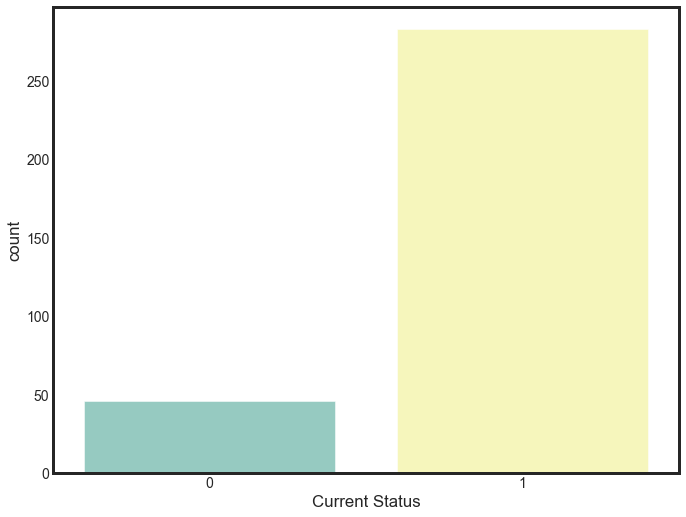

In [111]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(df4['Current Status'],label='Count',palette="Set3")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y_pred', ylabel='count'>

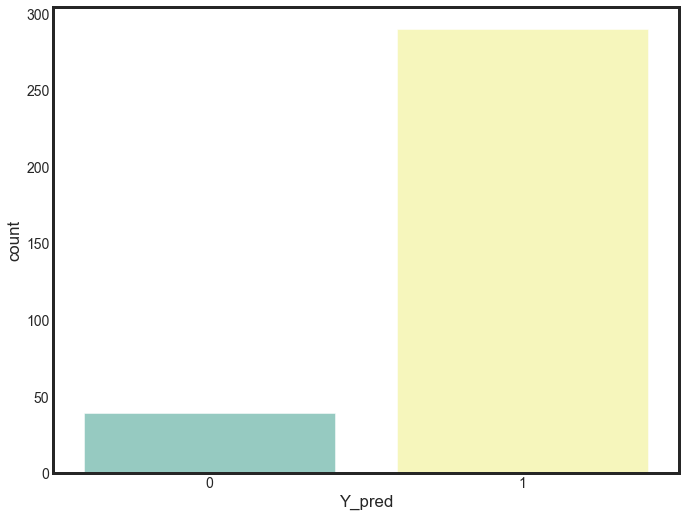

In [112]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(df4['Y_pred'],label='Count',palette="Set3")

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)


In [114]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc,X_train,Y_train,scoring='accuracy',cv=10))

[0.96103896 0.98701299 0.97402597 0.97402597 0.96103896 0.97402597
 1.         0.94736842 0.94736842 0.98684211]


In [115]:
accuracy = cross_val_score(rfc,X,Y,scoring='accuracy',cv=10).mean()*100
print('Accuracy of Random Forest is:',accuracy)


Accuracy of Random Forest is: 89.19766472060051


In [116]:
 from sklearn.model_selection import cross_val_predict
 y_pred = cross_val_predict(rfc, X_train,Y_train, cv=3)



In [117]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [118]:
print('Predicted values:')
print(y_pred)
print('Actual values:')
print(Y_test)

Predicted values:
[1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 